In [45]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise Exploratória dos Dados
- O principal passo de um projeto de Ciência de Dados, bem antes de usar modelos de Aprendizado de Máquinas, é **entender os seus dados**!
- Algumas etapas são fundamentais nesse processo!
- Para isso, vamos utilizar o dataset do titanic
    - https://www.kaggle.com/competitions/titanic/data

As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [46]:
# Importando o pandas
import pandas as pd

In [47]:
# Importando a base de dados
titanic = pd.read_csv("/content/drive/My Drive/titanic_train.csv")

In [48]:
# Visualizando as 3 primeiras linhas
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
# Visualizando as 3 últimas linhas
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
# Verificando o tamanho da base
titanic.shape

(891, 12)

### Visualizando um resumo das informações

In [51]:
# Verificando as informações
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# Contando a quantidade de valores nulos
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [53]:
# Verificando as informações estatísticas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**A cardinalidade nos ajuda a saber a quantidade de dados distintos em uma coluna**
- Se tivermos muitos valores distintos, provavelmente aquela coluna não será uma boa opção para usarmos no modelo
- Matematicamente, cardinalidade é o número de elementos de um conjunto
- Podemos verificar a cardinalidade usando o `.nunique()`

In [54]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


### Visualizando de forma gráfica
- Para visualizar essas informações de maneira gráfica, podemos utilizar o matplotlib
    - https://matplotlib.org/

In [55]:
# Importando o matplotlib
import matplotlib.pyplot as plt

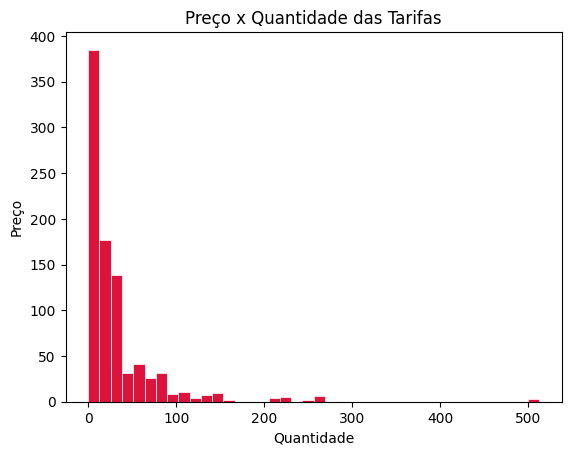

In [56]:
# Verificando o histograma das tarifas
fig, ax = plt.subplots()
ax.hist(titanic.Fare, bins=40, linewidth=0.5, edgecolor = "white", color = "crimson")
# plt.hist(titanic['Fare'], color="crimson")
plt.title("Preço x Quantidade das Tarifas")
plt.xlabel("Quantidade")
plt.ylabel("Preço")

plt.show()

<Figure size 800x400 with 0 Axes>

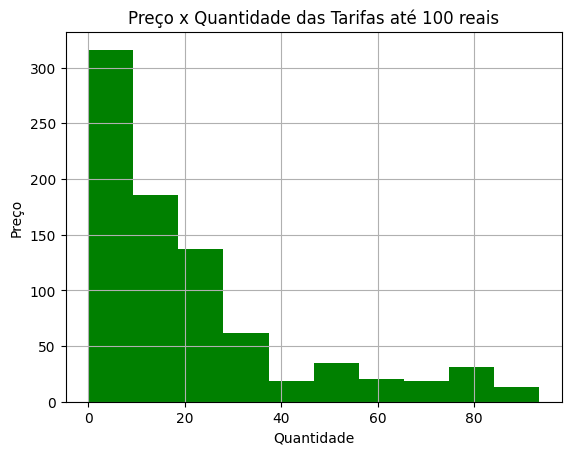

In [58]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
plt.figure(figsize=(8,4))
titanic[titanic.Fare < 100].hist("Fare", color="green")
plt.title("Preço x Quantidade das Tarifas até 100 reais")
plt.xlabel("Quantidade")
plt.ylabel("Preço")

plt.show()

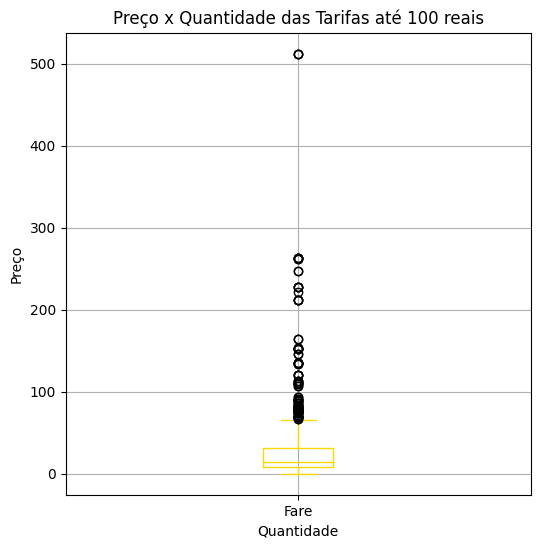

In [59]:
# Verificando o boxplot para a coluna Fare
plt.figure(figsize=(6,6))
titanic.boxplot("Fare", color="gold")
plt.title("Preço x Quantidade das Tarifas até 100 reais")
plt.xlabel("Quantidade")
plt.ylabel("Preço")

plt.show()

**Dependendo do visual, outras bibliotecas já podem ter opções mais prontas para usarmos, como o caso do pairplot no seaborn**
- Como cientistas, devemos escolher a ferramenta que melhor resolve o nosso problema
- O pairplot no seaborn:
    - https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [60]:
# Importando o seaborn
import seaborn as sns

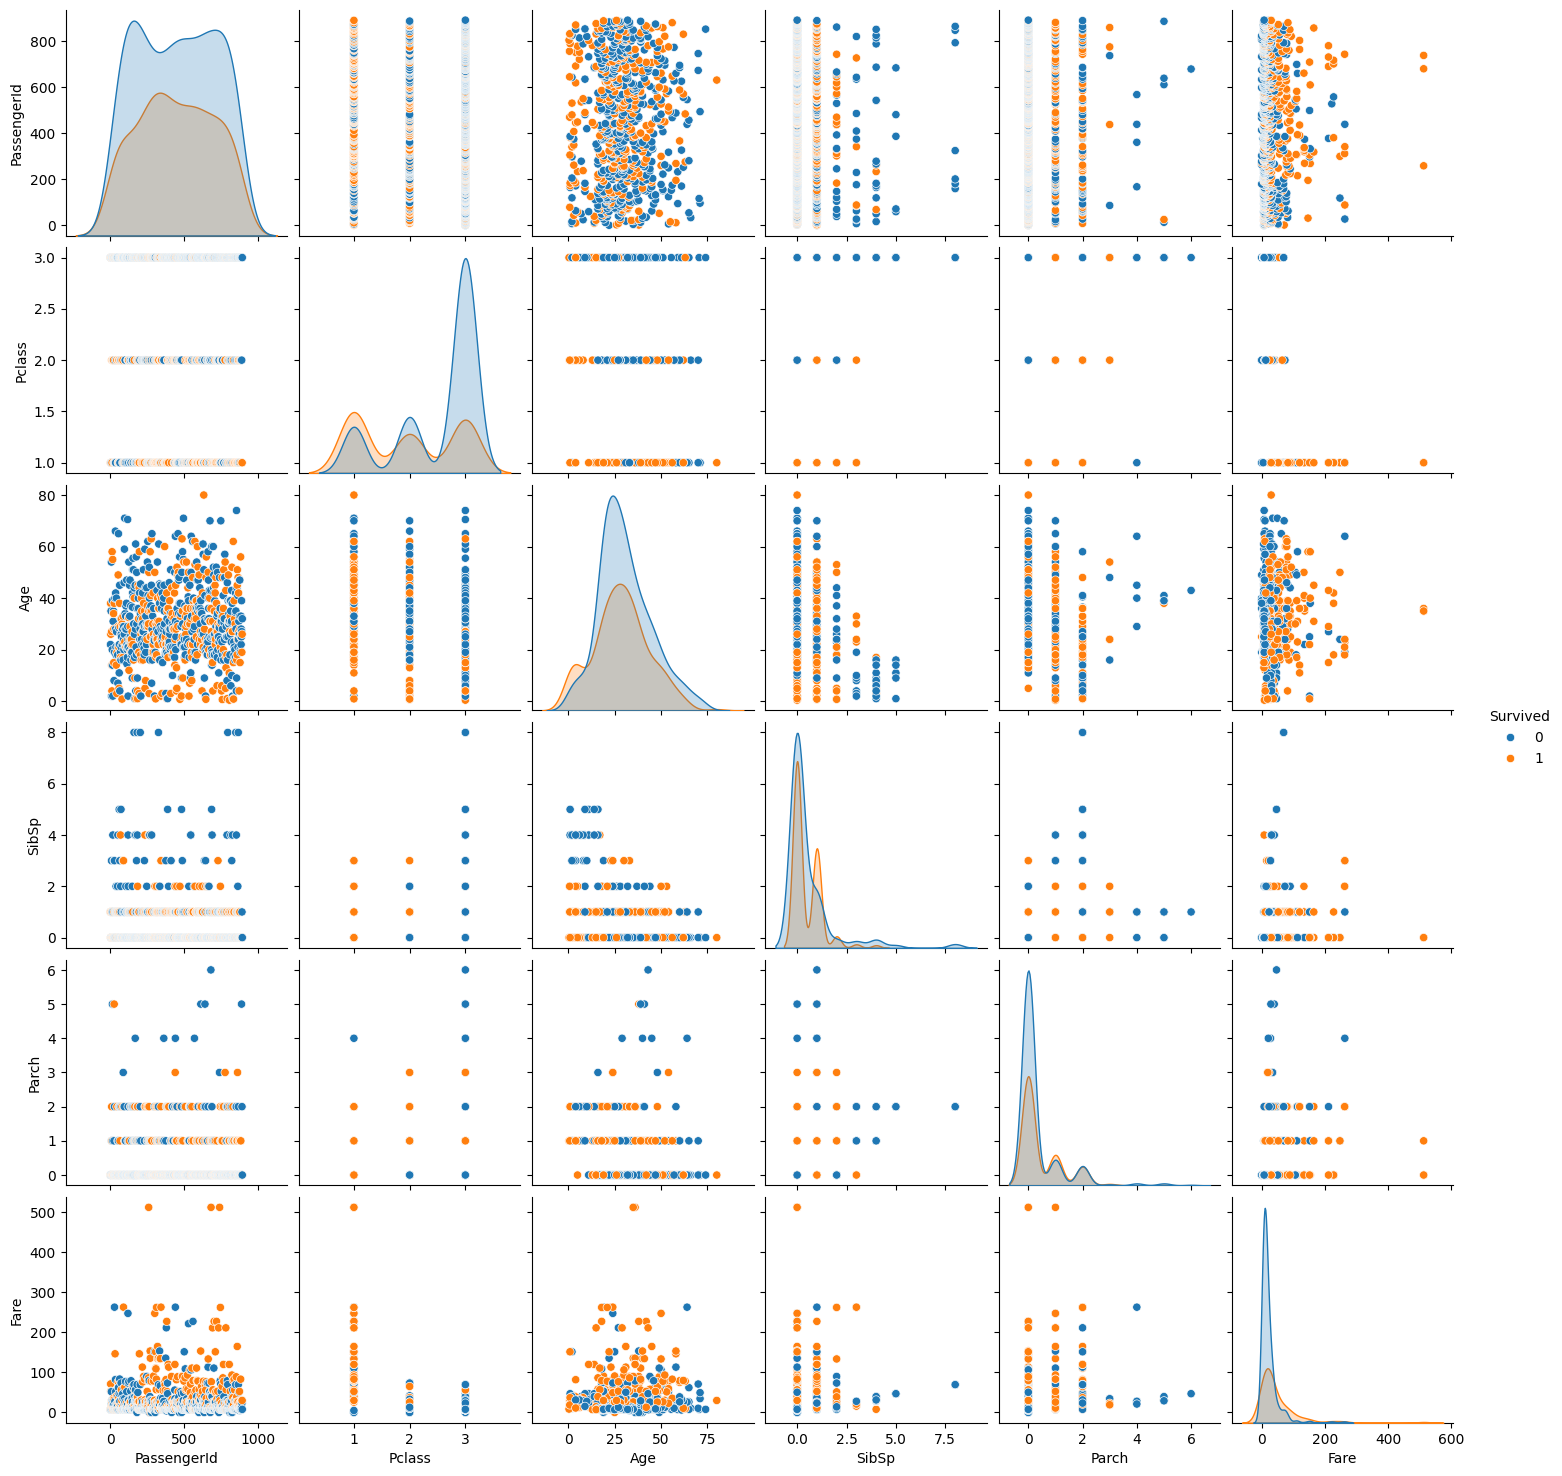

In [61]:
# Criando o pairplot
sns.pairplot(titanic, hue="Survived")

In [66]:
# Criando uma matriz de correlação entre as variáveis
corr = titanic.corr(numeric_only=True)
display(corr)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

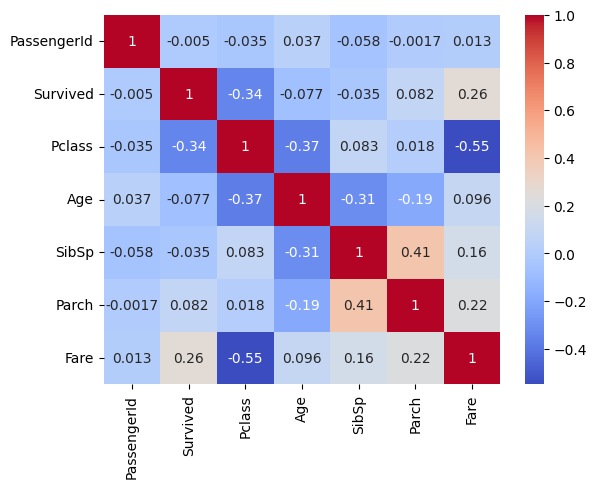

In [68]:
# Utilizando o heatmap do seaborn para tornar essa matriz mais visual
sns.heatmap(corr, cmap="coolwarm", annot=True)